In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.1
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [9]:
# 修改超参数 学习率
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# grad就是导数
# W = W + grad * learning_rate

# learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2,3e-1]
learning_rates = [1e-2, 3e-2,3e-1,1e-3]
# 初始化空的列表
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    # 这里用自己的optimizer
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                        validation_data = (x_valid_scaled, y_valid),
                        epochs = 20,
                        callbacks = callbacks)
    # 保存所有的history
    histories.append(history)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.8021 - val_loss: 0.6512
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4949 - val_loss: 0.4672
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4238 - val_loss: 0.4194
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.4130
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3914 - val_loss: 0.3981
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3823 - val_loss: 0.3945
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3793 - val_loss: 0.3849
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3753 - val_loss: 0.3853
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3721 - val_loss: 0.3792
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3691 - val_loss: 0.3745

Learning rate:  0.01
0.3435879647731781 0.3581456243991852


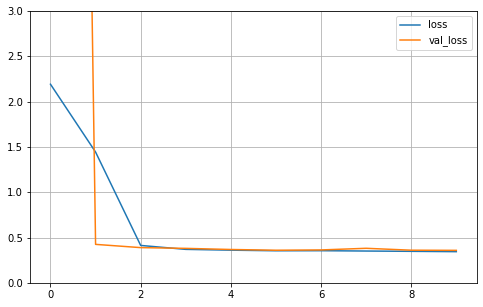

Learning rate:  0.03
nan nan


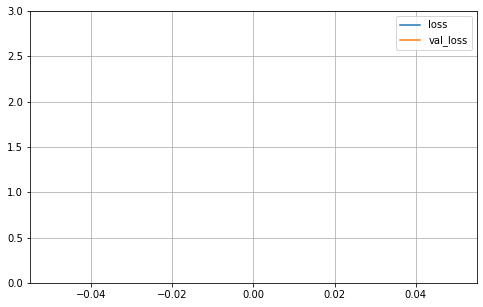

Learning rate:  0.3
nan nan


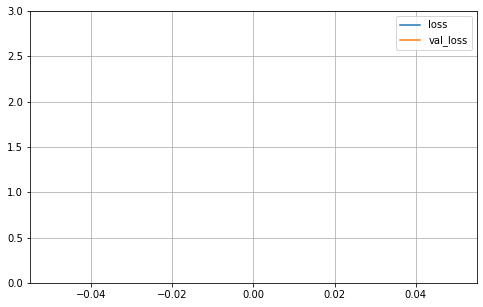

Learning rate:  0.001
0.4642427861690521 0.4952656924724579


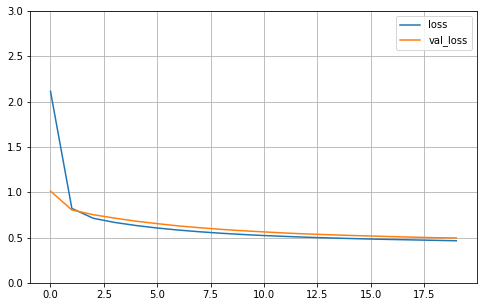

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

#每一次训练的结果history都被保存到了histories列表中
for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    print(history.history['loss'][-1],history.history['val_loss'][-1])
    plot_learning_curves(history)

In [7]:
history.history

{'loss': [2.113372564315796,
  0.8212252855300903,
  0.7123020887374878,
  0.6663343906402588,
  0.6324405670166016,
  0.6046944260597229,
  0.581789493560791,
  0.5629936456680298,
  0.5467005968093872,
  0.5332454442977905,
  0.521523118019104,
  0.5117251873016357,
  0.5030894875526428,
  0.4955885112285614,
  0.48905834555625916,
  0.48298704624176025,
  0.477933794260025,
  0.4733504056930542,
  0.4686353802680969,
  0.4642427861690521],
 'val_loss': [1.0123552083969116,
  0.803931713104248,
  0.7518913745880127,
  0.7139289379119873,
  0.6803448796272278,
  0.652873158454895,
  0.627709150314331,
  0.6076757311820984,
  0.5896674394607544,
  0.5744689106941223,
  0.5615849494934082,
  0.5493318438529968,
  0.5390753746032715,
  0.5308889150619507,
  0.5231693983078003,
  0.5163782835006714,
  0.509651243686676,
  0.5036381483078003,
  0.4978627562522888,
  0.4952656924724579]}